In [1]:
%load_ext autoreload
%autoreload 2

# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [48]:
from birdcall_distribution.data import prepare_dataframe
import pandas as pd

taxonomy_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/eBird_Taxonomy_v2021.csv"
)
taxonomy_df.columns = taxonomy_df.columns.str.lower()
species_mapper = taxonomy_df.set_index("species_code")["primary_com_name"].to_dict()

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=None,
)
# no imputing here
prep_df = prep_df[prep_df.y.notnull()]

<AxesSubplot:>

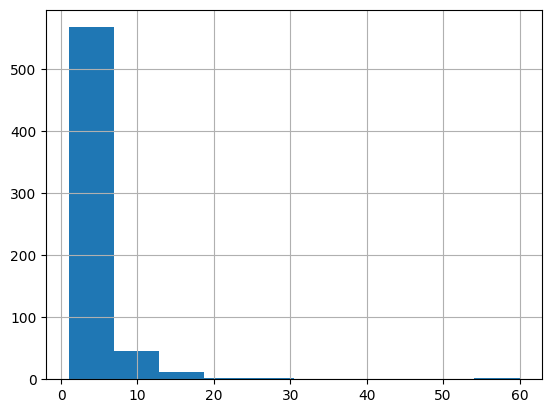

In [49]:
import numpy as np
import matplotlib.pyplot as plt

prep_df.y.hist()

In [50]:
prep_df.columns
prep_df.columns[5:-1]

Index(['population_density', 'elevation_p5', 'elevation_p50', 'elevation_p95',
       'LST_Day_1km_p5', 'LST_Day_1km_p50', 'LST_Day_1km_p95',
       'LST_Night_1km_p5', 'LST_Night_1km_p50', 'LST_Night_1km_p95',
       'land_cover_01', 'land_cover_02', 'land_cover_03', 'land_cover_04',
       'land_cover_05', 'land_cover_06', 'land_cover_07', 'land_cover_08',
       'land_cover_09', 'land_cover_10', 'land_cover_11', 'land_cover_12',
       'land_cover_13', 'land_cover_14', 'land_cover_15', 'land_cover_16',
       'land_cover_17'],
      dtype='object')

In [51]:
import pandas as pd

covariate_cols = prep_df.columns[5:-1]
sub_df = prep_df[covariate_cols]
log_sub_df = pd.DataFrame(
    np.log(sub_df + 1), columns=[f"log_{c}" for c in covariate_cols]
)
sub_df = pd.concat([sub_df, log_sub_df], axis=1)
sub_df

f:\omscs\bayes\birdcall-distribution\.venv\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,LST_Day_1km_p50,LST_Day_1km_p95,LST_Night_1km_p5,LST_Night_1km_p50,LST_Night_1km_p95,...,log_land_cover_08,log_land_cover_09,log_land_cover_10,log_land_cover_11,log_land_cover_12,log_land_cover_13,log_land_cover_14,log_land_cover_15,log_land_cover_16,log_land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,5.951349e+04,917.473286,1113.467367,1389.580957,25.930530,28.009886,30.650315,4.631122,6.189408,7.669540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5.951349e+04,917.473286,1113.467367,1389.580957,25.930530,28.009886,30.650315,4.631122,6.189408,7.669540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5.951349e+04,917.473286,1113.467367,1389.580957,25.930530,28.009886,30.650315,4.631122,6.189408,7.669540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5.951349e+04,917.473286,1113.467367,1389.580957,25.930530,28.009886,30.650315,4.631122,6.189408,7.669540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5.951349e+04,917.473286,1113.467367,1389.580957,25.930530,28.009886,30.650315,4.631122,6.189408,7.669540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.094765e+06,0.438378,103.526808,1143.404496,9.175678,13.170872,16.045858,4.169536,6.329767,8.003211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,1.094765e+06,0.438378,103.526808,1143.404496,9.175678,13.170872,16.045858,4.169536,6.329767,8.003211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,1.094765e+06,0.438378,103.526808,1143.404496,9.175678,13.170872,16.045858,4.169536,6.329767,8.003211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
from birdcall_distribution.data import prepare_scaled_data

covariate_cols = prep_df.columns[5:-1]
sub_df = prep_df[covariate_cols]
log_cols = [c for c in covariate_cols if "population" in c or "land_cover" in c]
log_sub_df = np.log(sub_df[log_cols] + 1)
log_sub_df.columns = [f"log_{c}" for c in log_cols]
sub_df = pd.concat([sub_df, log_sub_df], axis=1)
sub_df = prepare_scaled_data(sub_df, sub_df.columns, intercept=False)
sub_df

,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,LST_Day_1km_p50,LST_Day_1km_p95,LST_Night_1km_p5,LST_Night_1km_p50,LST_Night_1km_p95,...,log_land_cover_08,log_land_cover_09,log_land_cover_10,log_land_cover_11,log_land_cover_12,log_land_cover_13,log_land_cover_14,log_land_cover_15,log_land_cover_16,log_land_cover_17
0,-0.624732,0.630659,0.261067,-0.336173,0.929648,0.182665,-0.206644,-0.102804,-0.509443,-0.844522,...,-1.684646,-3.045176,0.917573,-1.532450,1.409008,-2.058231,-0.540776,-0.428172,-1.221119,-0.91964
1,-0.624732,0.630659,0.261067,-0.336173,0.929648,0.182665,-0.206644,-0.102804,-0.509443,-0.844522,...,-1.684646,-3.045176,0.917573,-1.532450,1.409008,-2.058231,-0.540776,-0.428172,-1.221119,-0.91964
2,-0.624732,0.630659,0.261067,-0.336173,0.929648,0.182665,-0.206644,-0.102804,-0.509443,-0.844522,...,-1.684646,-3.045176,0.917573,-1.532450,1.409008,-2.058231,-0.540776,-0.428172,-1.221119,-0.91964
3,-0.624732,0.630659,0.261067,-0.336173,0.929648,0.182665,-0.206644,-0.102804,-0.509443,-0.844522,...,-1.684646,-3.045176,0.917573,-1.532450,1.409008,-2.058231,-0.540776,-0.428172,-1.221119,-0.91964
4,-0.624732,0.630659,0.261067,-0.336173,0.929648,0.182665,-0.206644,-0.102804,-0.509443,-0.844522,...,-1.684646,-3.045176,0.917573,-1.532450,1.409008,-2.058231,-0.540776,-0.428172,-1.221119,-0.91964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,-0.409268,-0.883584,-1.059556,-0.633471,-1.344502,-1.759397,-2.238749,-0.191157,-0.481737,-0.777841,...,0.125025,-1.100915,-2.039863,1.366149,-1.205835,-0.331398,-0.540776,1.653945,-0.513369,1.28724
631,-0.409268,-0.883584,-1.059556,-0.633471,-1.344502,-1.759397,-2.238749,-0.191157,-0.481737,-0.777841,...,0.125025,-1.100915,-2.039863,1.366149,-1.205835,-0.331398,-0.540776,1.653945,-0.513369,1.28724
632,-0.409268,-0.883584,-1.059556,-0.633471,-1.344502,-1.759397,-2.238749,-0.191157,-0.481737,-0.777841,...,0.125025,-1.100915,-2.039863,1.366149,-1.205835,-0.331398,-0.540776,1.653945,-0.513369,1.28724
633,-0.409268,-0.883584,-1.059556,-0.633471,-1.344502,-1.759397,-2.238749,-0.191157,-0.481737,-0.777841,...,0.125025,-1.100915,-2.039863,1.366149,-1.205835,-0.331398,-0.540776,1.653945,-0.513369,1.28724


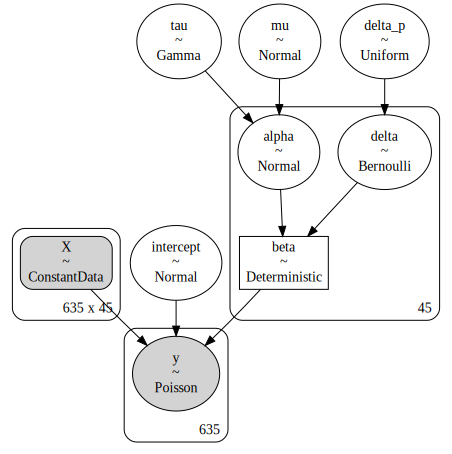

In [86]:
import pymc as pm
import arviz as az

# do stochastic search variable selection
with pm.Model() as ssvs_model:
    X = pm.ConstantData("X", sub_df)
    p = sub_df.shape[1]

    delta_p = pm.Uniform("delta_p", 0, 1)
    delta = pm.Bernoulli("delta", p=delta_p, shape=p)

    mu = pm.Normal("mu", mu=0, tau=1e-3)
    tau = pm.Gamma("tau", 0.1, 0.1)
    alpha = pm.Normal("alpha", mu=mu, tau=tau, shape=p)
    betas = pm.Deterministic("beta", delta * alpha)
    intercept = pm.Normal("intercept", 0, tau=1e-3)

    mu = pm.math.exp(intercept + pm.math.sum(X * betas, axis=1))
    pm.Poisson("y", mu=mu, observed=np.ma.masked_invalid(prep_df.y.values))

pm.model_to_graphviz(ssvs_model)

In [87]:
with ssvs_model:
    trace = pm.sample(2500, tune=1000, cores=16, target_accept=0.9)

Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [delta_p, mu, tau, alpha, intercept]
>BinaryGibbsMetropolis: [delta]


Sampling 16 chains for 1_000 tune and 2_500 draw iterations (16_000 + 40_000 draws total) took 272 seconds.
f:\omscs\bayes\birdcall-distribution\.venv\lib\site-packages\arviz\stats\diagnostics.py:584: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [89]:
az.summary(trace, var_names=["~delta", "~beta", "~alpha"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.022,0.109,-0.232,0.186,0.001,0.001,19121.0,12449.0,1.00
intercept,1.046,0.025,0.999,1.092,0.000,0.000,43934.0,29073.0,1.00
delta_p,0.502,0.133,0.272,0.761,0.007,0.005,335.0,1060.0,1.04
tau,5.739,2.810,1.449,11.035,0.092,0.065,753.0,2090.0,1.02


In [121]:
res = az.summary(trace, var_names=["delta"], kind="stats")
res["feature_name"] = sub_df.columns
res

,mean,sd,hdi_3%,hdi_97%,feature_name
delta[0],0.518,0.500,0.0,1.0,population_density
delta[1],0.434,0.496,0.0,1.0,elevation_p5
delta[2],0.477,0.499,0.0,1.0,elevation_p50
delta[3],0.338,0.473,0.0,1.0,elevation_p95
delta[4],1.000,0.000,1.0,1.0,LST_Day_1km_p5
delta[5],0.399,0.490,0.0,1.0,LST_Day_1km_p50
delta[6],0.946,0.227,1.0,1.0,LST_Day_1km_p95
delta[7],1.000,0.000,1.0,1.0,LST_Night_1km_p5
delta[8],0.368,0.482,0.0,1.0,LST_Night_1km_p50
delta[9],0.308,0.462,0.0,1.0,LST_Night_1km_p95


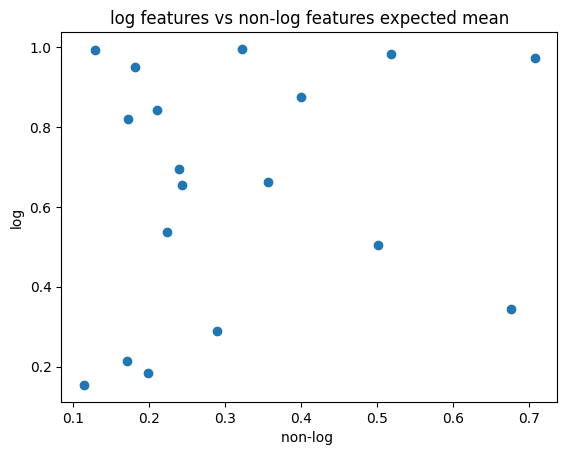

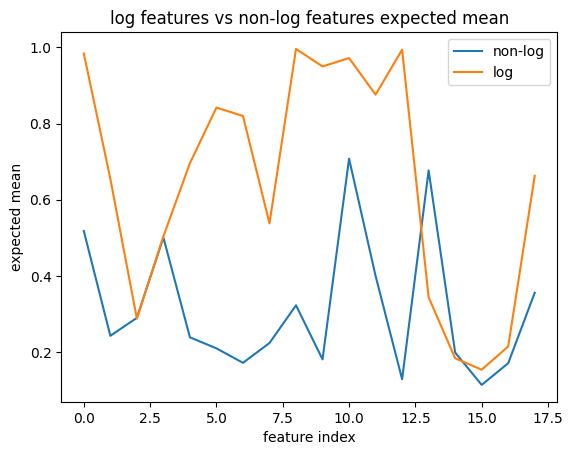

In [135]:
# is it better to use log features or not?
non_log_df = res[res.feature_name.isin(log_cols)]
log_df = res[res.feature_name.isin([f"log_{c}" for c in log_cols])]

plt.title("log features vs non-log features expected mean")
plt.plot(non_log_df["mean"], log_df["mean"], "o")
plt.xlabel("non-log ")
plt.ylabel("log")
plt.show()

plt.title("log features vs non-log features expected mean")
plt.plot(non_log_df["mean"].values, label="non-log")
plt.plot(log_df["mean"].values, label="log")
plt.xlabel("feature index")
plt.ylabel("expected mean")
plt.legend()
plt.show()

## model with fewer features

In [136]:
import pymc as pm
import arviz as az

covariate_cols = prep_df.columns[5:-1]
log_cols = [c for c in covariate_cols if "population" in c or "land_cover" in c]
scaled_df = prepare_scaled_data(prep_df, covariate_cols, log_cols, intercept=False)

# do stochastic search variable selection
with pm.Model() as ssvs_small_model:
    X = pm.ConstantData("X", scaled_df)
    p = scaled_df.shape[1]

    delta_p = pm.Uniform("delta_p", 0, 1)
    delta = pm.Bernoulli("delta", p=delta_p, shape=p)

    mu = pm.Normal("mu", mu=0, tau=1e-3)
    tau = pm.Gamma("tau", 0.1, 0.1)
    alpha = pm.Normal("alpha", mu=mu, tau=tau, shape=p)
    betas = pm.Deterministic("beta", delta * alpha)
    intercept = pm.Normal("intercept", 0, tau=1e-3)

    mu = pm.math.exp(intercept + pm.math.sum(X * betas, axis=1))
    pm.Poisson("y", mu=mu, observed=np.ma.masked_invalid(prep_df.y.values))

In [137]:
with ssvs_small_model:
    trace_small = pm.sample(5000, tune=1000, cores=16, target_accept=0.9)

Multiprocess sampling (16 chains in 16 jobs)
CompoundStep
>NUTS: [delta_p, mu, tau, alpha, intercept]
>BinaryGibbsMetropolis: [delta]


Sampling 16 chains for 1_000 tune and 5_000 draw iterations (16_000 + 80_000 draws total) took 293 seconds.
f:\omscs\bayes\birdcall-distribution\.venv\lib\site-packages\arviz\stats\diagnostics.py:584: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [138]:
res = az.summary(trace_small, var_names=["delta"], kind="stats")
res["feature_name"] = scaled_df.columns
res

,mean,sd,hdi_3%,hdi_97%,feature_name
delta[0],0.993,0.086,1.0,1.0,population_density
delta[1],0.668,0.471,0.0,1.0,elevation_p5
delta[2],0.605,0.489,0.0,1.0,elevation_p50
delta[3],0.625,0.484,0.0,1.0,elevation_p95
delta[4],1.000,0.000,1.0,1.0,LST_Day_1km_p5
delta[5],0.862,0.345,0.0,1.0,LST_Day_1km_p50
delta[6],0.730,0.444,0.0,1.0,LST_Day_1km_p95
delta[7],1.000,0.000,1.0,1.0,LST_Night_1km_p5
delta[8],0.645,0.479,0.0,1.0,LST_Night_1km_p50
delta[9],0.574,0.494,0.0,1.0,LST_Night_1km_p95


In [161]:
from collections import Counter

deltas = trace_small.posterior.delta.to_numpy()
reshaped = deltas.reshape(-1, deltas.shape[-1])

list(map(list, reshaped))

delta_counts = Counter(list(map(lambda x: "".join(list(map(str, x))), reshaped)))
total = sum(delta_counts.values())
common = [(k, v / total) for k, v in delta_counts.most_common(n=20)]
common

[('111111111111111111111111111', 0.0507125),
 ('111111111111111111111111011', 0.012425),
 ('111111111111111111111110111', 0.0118375),
 ('111111111111111111111111101', 0.0099625),
 ('111111111110111111111111111', 0.007625),
 ('111111111111111111111110011', 0.0058125),
 ('111111111011111111111111111', 0.005175),
 ('110111111111111111111111111', 0.0045125),
 ('111111111111111111111110101', 0.0042125),
 ('111111111110111111111110111', 0.0038125),
 ('111111111110111111111111101', 0.0036875),
 ('111111111110111111111111011', 0.003375),
 ('111111111111111111111101111', 0.0033375),
 ('101111111111111111111111111', 0.0033),
 ('111111111111111111111110001', 0.0030375),
 ('111111111111111111111111001', 0.002925),
 ('110111111111111111111110111', 0.0025625),
 ('111111111110111111111110011', 0.00255),
 ('111011111111111111111111111', 0.0024875),
 ('111111111110111111111110101', 0.0024)]